In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import sqlite3
from sklearn import svm
from sklearn.model_selection import cross_val_score, LeaveOneOut, train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
sns.set()

In [85]:
ohinfo = np.load('/home/kfang/one_hot_blood_type/hiq-218/names')
Xtrain = np.load('/home/kfang/one_hot_blood_type/hiq-218/hiq-pgp')
varPaths = np.load('/home/kfang/one_hot_blood_type/hiq-218/hiq-pgp-info')

In [3]:
ohinfo = np.load('/home/kfang/one_hot_blood_type/hiq-214/names-214.npy')
Xtrain = np.load('/home/kfang/one_hot_blood_type/hiq-214/hiq-pgp')
varPaths = np.load('/home/kfang/one_hot_blood_type/hiq-214/hiq-pgp-info')

In [107]:
ohinfo

array(['hg19', 'hu011C57-GS01669-DNA_B05', 'hu016B28-GS01669-DNA_H03',
       'hu01F73B-GS03133-DNA_A02', 'hu0211D6-GS01175-DNA_E02',
       'hu025CEA-GS01669-DNA_D02', 'hu032C04-GS01669-DNA_A10',
       'hu034DB1-GS00253-DNA_A02', 'hu034DB1-GS01669-DNA_A03',
       'hu03E3D2-GS03132-DNA_D01', 'hu040C0A-GS01175-DNA_F05',
       'hu0486D6-GS03132-DNA_C01', 'hu04DF3C-GS01670-DNA_A02',
       'hu04F220-GS01670-DNA_A01', 'hu04FD18-GS00253-DNA_F01',
       'hu050E9C-GS01173-DNA_G06', 'hu05FD49-GS01175-DNA_D04',
       'hu085B6D-GS03132-DNA_A01', 'hu089792-GS02269-DNA_B02',
       'hu0A4518-GS01670-DNA_F01', 'hu0CF2EE-GS01175-DNA_F06',
       'hu0D1FA1-GS01669-DNA_G09', 'hu0D879F-GS00253-DNA_G01',
       'hu0D879F-GS01669-DNA_A08', 'hu0E64A1-GS01173-DNA_B02',
       'hu0E7AAF-GS03023-DNA_A01', 'hu1187FF-GS02269-DNA_A04',
       'hu132B5C-GS01670-DNA_E01', 'hu1378E3-GS01669-DNA_C03',
       'hu15FECA-GS01175-DNA_F03', 'hu1904EC-GS01175-DNA_E06',
       'hu19C09F-GS01669-DNA_F05', 'hu1E868D-GS

In [86]:
conn = sqlite3.connect('/home/kfang/one_hot_blood_type/untap.db')
c = conn.cursor()
c.execute('SELECT * FROM demographics')
rows = c.fetchall()
colnames = [i[0] for i in c.description]
data = pd.DataFrame(rows, columns=colnames)
conn.close()

In [87]:
dataBloodType = data[['human_id', 'blood_type']]
dataBloodType = dataBloodType.replace('', np.nan, inplace=False)
dataBloodType = dataBloodType.dropna(axis=0, how='any', inplace=False)

# Creating dummy variables for A, B and rh factor
dataBloodType['A'] = dataBloodType['blood_type'].str.contains('A',na=False).astype(int)
dataBloodType['B'] = dataBloodType['blood_type'].str.contains('B',na=False).astype(int)
dataBloodType['Rh'] = dataBloodType['blood_type'].str.contains('\+',na=False).astype(int)

dataBloodType

,human_id,blood_type,A,B,Rh
0,hu43860C,O+,0,0,1
1,huC30901,O-,0,0,0
2,hu9385BA,A+,1,0,1
3,hu04FD18,O+,0,0,1
4,huAE6220,B+,0,1,1
5,hu604D39,AB+,1,1,1
6,hu6E4515,O+,0,0,1
11,hu2DBF2D,O-,0,0,0
14,hu72A81D,A+,1,0,1
17,hu2D6140,O+,0,0,1


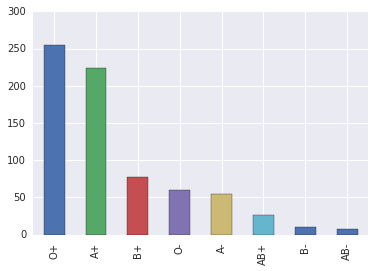

In [88]:
dataBloodType['blood_type'].value_counts().plot(kind='bar')


In [89]:
# Getting phenotypes for huIDs that have associated genotypes

g2 = lambda x:x[0:x.find(b"-")]
results = [g2(i).decode("utf-8").lower() for i in ohinfo]

df = pd.DataFrame(results,columns={'Sample'})
df['Number'] = df.index

In [90]:
df

,Sample,Number
0,hg1,0
1,hu011c57,1
2,hu016b28,2
3,hu01f73b,3
4,hu0211d6,4
5,hu025cea,5
6,hu032c04,6
7,hu034db1,7
8,hu034db1,8
9,hu03e3d2,9


In [91]:
dataBloodType.human_id = dataBloodType.human_id.str.lower()
df2 =  df.merge(dataBloodType,left_on = 'Sample', right_on='human_id', how='inner')
del dataBloodType
df2

,Sample,Number,human_id,blood_type,A,B,Rh
0,hu016b28,2,hu016b28,A+,1,0,1
1,hu025cea,5,hu025cea,O-,0,0,0
2,hu040c0a,10,hu040c0a,A-,1,0,0
3,hu04df3c,12,hu04df3c,B+,0,1,1
4,hu04f220,13,hu04f220,B+,0,1,1
5,hu04fd18,14,hu04fd18,O+,0,0,1
6,hu050e9c,15,hu050e9c,O-,0,0,0
7,hu05fd49,16,hu05fd49,A+,1,0,1
8,hu0a4518,19,hu0a4518,B+,0,1,1
9,hu0d1fa1,21,hu0d1fa1,O+,0,0,1


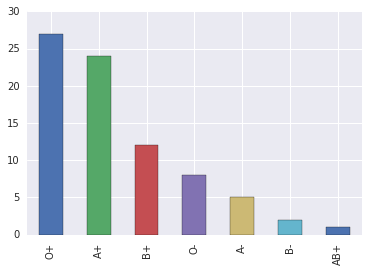

In [92]:
df2['blood_type'].value_counts().plot(kind='bar')

In [93]:
df2['blood_type'].value_counts()
del df

In [94]:
# Get genotypes that have associated blood type phenotype


idx = df2['Number'].values

Xtrain = Xtrain[idx,:] 
Xtrain.shape

(79, 2469062)

In [95]:
# Remove tiles (columns) that don't have more than 1 tile varient at every position
# Actually probably will want to technically do this before the one-hot, so I am keeping these in for the moment

min_indicator = np.amin(Xtrain, axis=0)
max_indicator = np.amax(Xtrain, axis=0)

sameTile = min_indicator == max_indicator
skipTile = ~sameTile

Xtrain = Xtrain[:,skipTile]
justVarPathsNew = varPaths[skipTile]

Xtrain.shape

(79, 1279241)

In [96]:
# Scaling the Training Data

Xtrain = preprocessing.scale(Xtrain.astype('double'))

In [97]:
y = df2.A.values

del df2

In [98]:
Xtrain

array([[-0.1132277 , -0.16116459,  0.1132277 , ...,  0.16116459,
         0.16116459, -0.1132277 ],
       [-0.1132277 , -0.16116459,  0.1132277 , ...,  0.16116459,
         0.16116459, -0.1132277 ],
       [-0.1132277 , -0.16116459,  0.1132277 , ...,  0.16116459,
         0.16116459, -0.1132277 ],
       ...,
       [-0.1132277 , -0.16116459,  0.1132277 , ...,  0.16116459,
         0.16116459, -0.1132277 ],
       [-0.1132277 , -0.16116459,  0.1132277 , ...,  0.16116459,
         0.16116459, -0.1132277 ],
       [-0.1132277 , -0.16116459,  0.1132277 , ...,  0.16116459,
         0.16116459, -0.1132277 ]])

In [99]:
X_train, X_test, y_train, y_test = train_test_split(Xtrain, y, test_size=0.2)

In [100]:
# C = 0.01  # SVM regularization parameter
classifier = svm.LinearSVC(penalty='l1', class_weight=None, dual=False, C=.02)
svc = classifier.fit(X_train, y_train)

In [101]:
y_pred = classifier.predict(X_test)

In [102]:
print(accuracy_score(y_test, y_pred))

0.6875


In [65]:
np.nonzero(classifier.coef_)

(array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([ 208163,  279730,  711519,  711523,  711527,  711529, 1080618,
        1080629]))

In [67]:
svc = classifier

In [68]:
np.nonzero(svc.coef_)[1].shape

(8,)

In [72]:
svc.coef_.max()

0.23468725081569566

In [73]:
svc.coef_.argmax()

711529

In [77]:
coefPaths = justVarPathsNew[711529]
coefPaths

473958201

In [78]:
vhex = np.vectorize(hex)
tile_path = np.trunc(coefPaths/(16**5))
tile_step = np.trunc((coefPaths - tile_path*16**5)/2)
tile_phase = np.trunc((coefPaths- tile_path*16**5 - 2*tile_step))
tile_path

452.0

In [79]:
vhex(tile_path.astype('int'))


array('0x1c4', dtype='|S5')

In [80]:
vhex(tile_step.astype('int'))

array('0x39c', dtype='|S5')

In [83]:
svc.coef_[0][711529]

0.23468725081569566

In [84]:
# retrieve all the nonzero coefficients and zip them with their respective indices
nonzeroes = np.nonzero(svc.coef_[0])[0]
coefs = zip(nonzeroes, abs(svc.coef_[0][nonzeroes]))

# sort the coefficients by their value, instead of index
coefs.sort(key = lambda x: x[1], reverse=True)

for coef in coefs:
    print coef

(711529, 0.23468725081569566)
(711527, 0.11042205463738404)
(208163, 0.04994535763800179)
(711519, 0.004620615726530893)
(1080618, 0.004512625101065415)
(1080629, 0.003252220388615562)
(279730, 0.0030477132122879755)
(711523, 0.0004664352385128069)


In [69]:
idxNZ = np.nonzero(svc.coef_)

In [70]:
n = 10
scores = cross_val_score(classifier, Xtrain, y, cv=n)

In [71]:
scores

array([1.        , 0.875     , 0.875     , 0.75      , 1.        ,
       0.875     , 0.75      , 0.75      , 0.875     , 0.85714286])

In [103]:
# Fit with dask-searchcv
from dask_searchcv import GridSearchCV
crange = np.logspace(-2, 1, 10).tolist()
param_space = {'C': crange,
               'class_weight': [None, 'balanced']}

model = svm.LinearSVC(penalty='l1', dual=False, verbose=1, max_iter=1000)

search = GridSearchCV(model, param_space, cv=5)
search.fit(Xtrain, y)
print(search.best_params_)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear

In [106]:
search.cv_results_

{'mean_fit_time': array([21.28943458, 20.07266712, 24.13054724, 27.59238343, 39.43025718,
        37.86839676, 56.57614541, 48.5969923 , 55.41561742, 51.4707726 ,
        30.04637642, 31.519103  , 29.57292805, 26.84360099, 40.55237217,
        27.60696464, 23.7578548 , 33.15334444, 32.17399268, 34.26699061]),
 'mean_score_time': array([0.08530502, 0.05821662, 0.46108651, 1.19910107, 0.13949757,
        0.06886058, 0.477601  , 1.59671235, 0.58073816, 0.18290362,
        1.40701423, 0.15762281, 0.7958426 , 2.59174538, 0.35110164,
        0.0784174 , 0.3094214 , 1.49996457, 0.5605042 , 2.32311015]),
 'mean_test_score': array([0.62025316, 0.62025316, 0.70886076, 0.74683544, 0.50632911,
        0.67088608, 0.48101266, 0.46835443, 0.48101266, 0.46835443,
        0.4556962 , 0.46835443, 0.51898734, 0.46835443, 0.4556962 ,
        0.41772152, 0.41772152, 0.40506329, 0.51898734, 0.43037975]),
 'mean_train_score': array([0.6202381 , 0.6202381 , 0.92698413, 0.8952381 , 1.        ,
        1.     